In [1]:
import pandas as pd
import sqlite3 as sql # included as part of python standard library
import warnings
warnings.filterwarnings("ignore")
from IPython.display import Image

In [2]:
# creating connection
conn  = sql.connect("Db-IMDB.db")

In [3]:
# Get list of all tables in the DB.
result = pd.read_sql_query("SELECT tbl_name FROM sqlite_master where type = 'table';", conn)
print(result)

      tbl_name
0        Movie
1        Genre
2     Language
3      Country
4     Location
5   M_Location
6    M_Country
7   M_Language
8      M_Genre
9       Person
10  M_Producer
11  M_Director
12      M_Cast


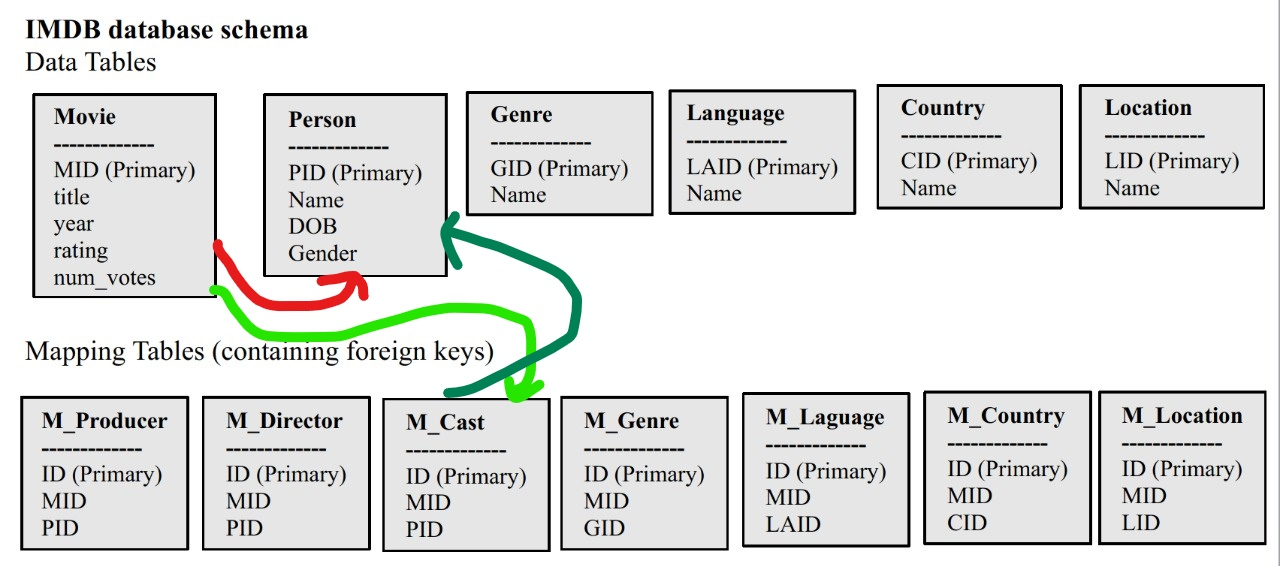

In [17]:
Image("img/ans_5_b.jpg",width=1200, height=300)

### Question 5:- b. --::-- Report for each year the percentage of movies in that year with only female actors, and the total number of movies made that year. 

In [15]:
# source :- https://stackoverflow.com/questions/63226496/imdb-dataset-select-movie-count-according-to-year-with-movies-with-only-female-c

pr_5 = pd.read_sql_query("""

select  movie_year, count(*) no_movies, avg(has_male_actor = 0)*100 ratio
from (
    select CAST(SUBSTR(m.year,-4) AS UNSIGNED) movie_year, max(p.gender = 'Male') has_male_actor
    from movie m
    inner join m_cast mc on TRIM(mc.mid) = TRIM(m.mid)
    inner join person p on TRIM(p.pid) = TRIM(mc.pid)
    group by m.mid, m.year
) t
group by movie_year


""", conn)

In [16]:
pr_5

,movie_year,no_movies,ratio
0,1931,1,0.000000
1,1936,3,0.000000
2,1939,2,50.000000
3,1941,1,0.000000
4,1943,1,0.000000
...,...,...,...
73,2014,126,0.000000
74,2015,119,0.000000
75,2016,129,0.000000
76,2017,126,0.000000
